<a href="https://colab.research.google.com/github/SamuelBFG/DL-studies/blob/master/%5B261663%5DQ5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IA353 - Redes Neurais
# EFC3 - Questão 5_1

**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):**  Samuel Borges Ferreira Gomes 

### 5.1. Imports

In [1]:
!pip install keras

In [1]:
import tensorflow as tf
import os

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, Input, Conv2DTranspose, Conv2D, Reshape
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

### 5.2. Reading the data

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [5]:
x_images = x_train.reshape(x_train.shape[0], 28, 28)

In [6]:
# Definition of a function to visualize some digits
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")

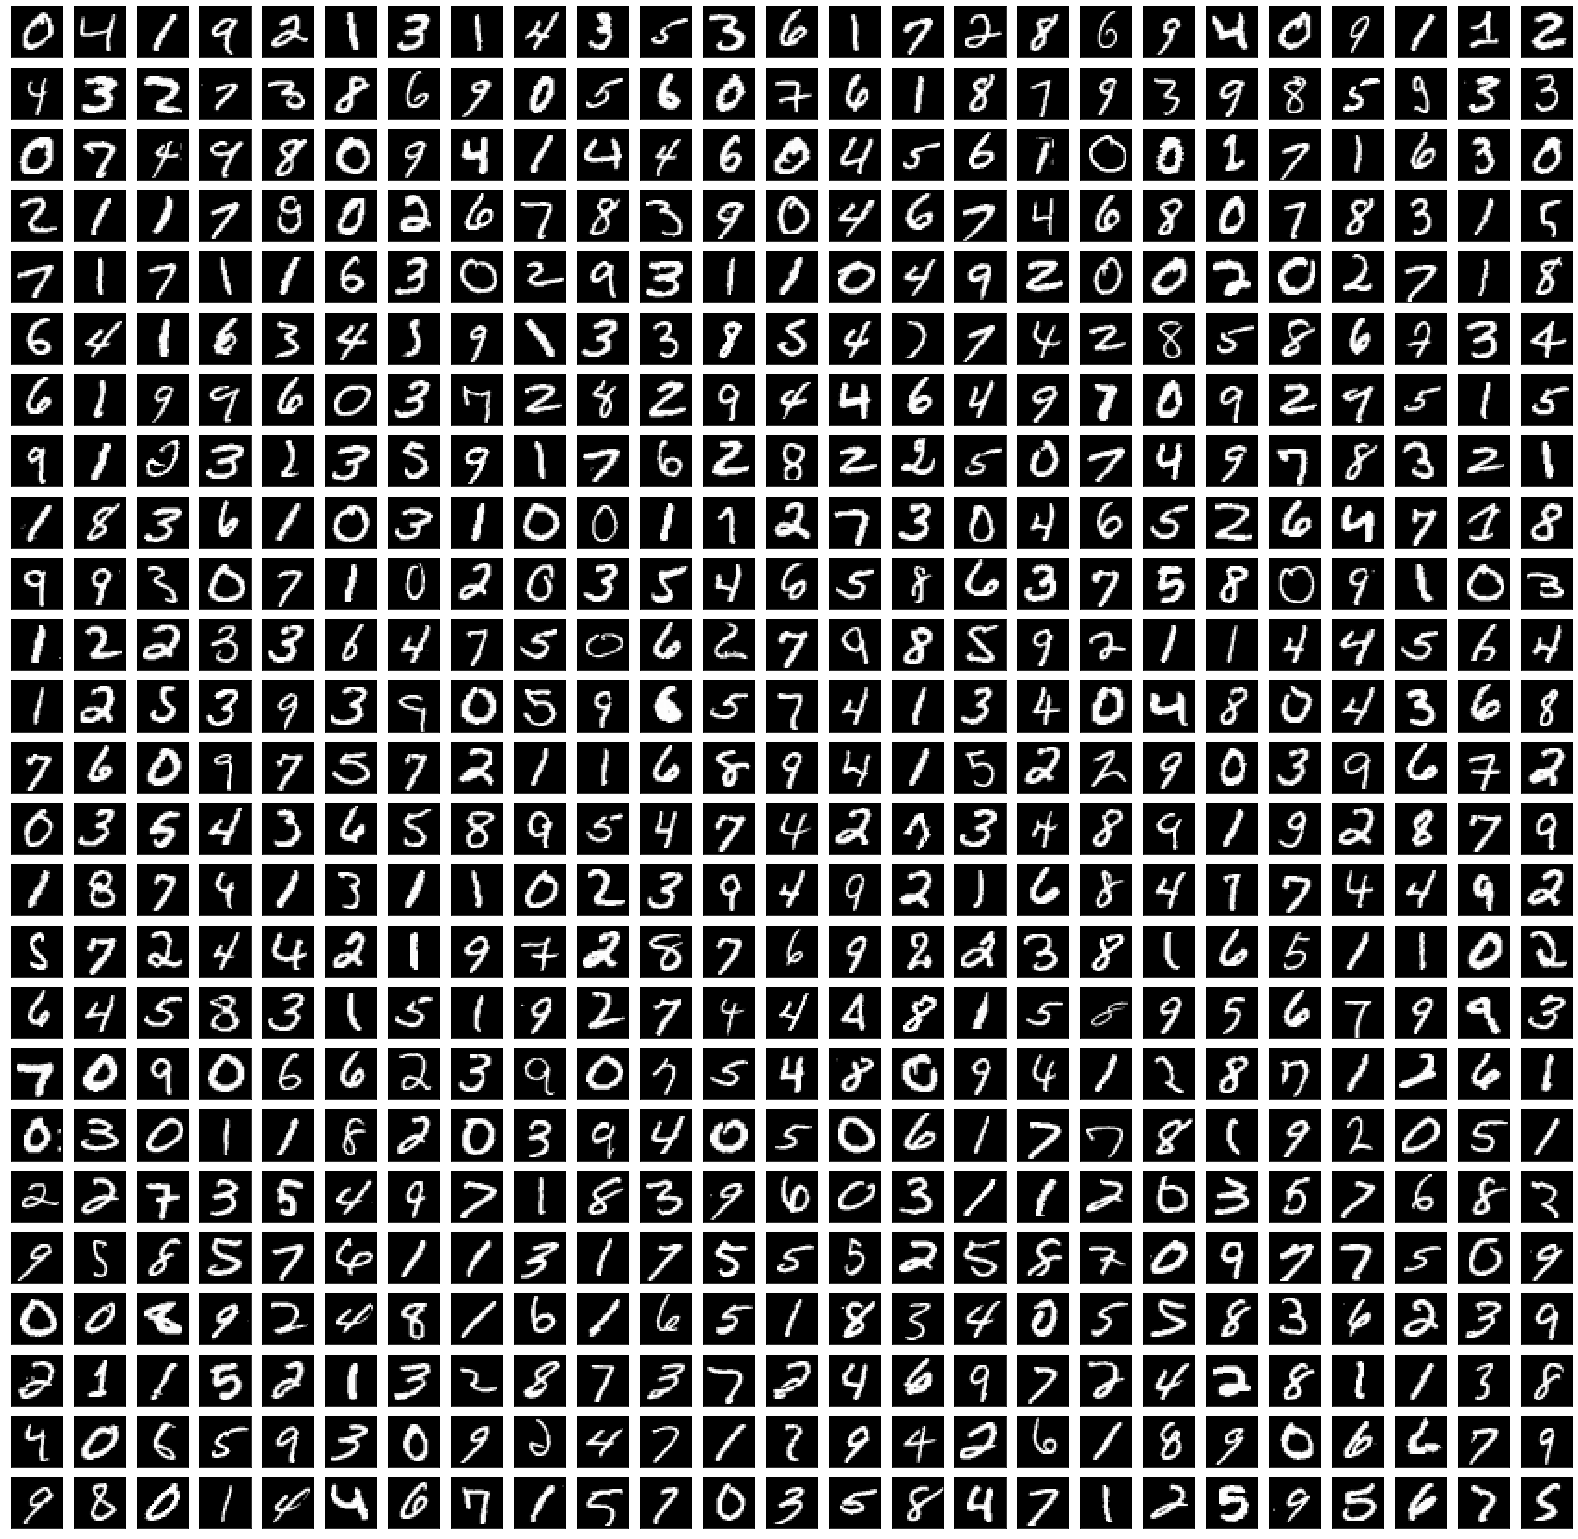

In [7]:
# Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(28,28))
ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25,25,ind)
        show(x_images[ind])
        plt.xticks([])
        plt.yticks([])
        ind+=1

### 5.3 Proposal for the autoencoder architecture

In [8]:
# input_img = Input(shape=(28,28,1))

# encoded = Convolution2D(filters=32, strides=2, kernel_size=2, activation='relu')(input_img)
# encoded = Convolution2D(filters=64, strides=2, kernel_size=2, activation='relu')(encoded)
# encoded = Convolution2D(filters=128, strides=2, kernel_size=2, activation='relu')(encoded)
# encoded = Flatten()(encoded)

# encoded = Dense(2, activation='linear')(encoded) # Linear activation function at the bottleneck

# decoded = Dense(1152, activation='relu')(encoded)

# decoded = tf.keras.layers.Reshape((3,3,128))(decoded)

# # decoded =  tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(decoded)

# # decoded = tf.keras.layers.Reshape((3,3,128),input_shape=(1152,))(decoded)
# # decoded = Convolution2D(128, 3, activation='relu')(decoded)
# # decoded = Convolution2D(512, 3, activation='relu')(decoded)

# decoded = Dense(784, activation = 'sigmoid')(decoded)

# autoencoder = Model(input_img, decoded)

In [9]:
input = Input(shape=(28,28,1))

# Encoder
x = Conv2D(filters=32, strides=2, kernel_size=2, activation='relu')(input)
x = Conv2D(filters=64, strides=2, kernel_size=2, activation='relu')(x)
x = Conv2D(filters=128, strides=2, kernel_size=2, activation='relu')(x)
x = Flatten()(x)

x = Dense(2, activation='linear')(x) # Linear activation function at the bottleneck


# Decoder
x = Dense(3*3*128, activation='relu')(x)
x = Reshape((3,3,128))(x)
x = Conv2DTranspose(filters=64, strides=2, kernel_size=3, activation="relu")(x)
x = Conv2DTranspose(filters=32, strides=2, kernel_size=2, activation="relu")(x)
x = Conv2DTranspose(filters=1, strides=2, kernel_size=2, activation="sigmoid")(x)

# Autoencoder
autoencoder = Model(input, x)
# autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         32896     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2306      
_________________________________________________________________
dense_1 (Dense)              (None, 1152)              3456  

In [10]:
autoencoder.compile(optimizer = "adam", loss = "mse")
# X = x_train.reshape(x_train.shape[0], 784)
history = autoencoder.fit(x_train, x_train, batch_size = 64, epochs = 50, verbose = 1)

Epoch 1/50
938/938 [==============================] - 48s 4ms/step - loss: 0.0910
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0498
Epoch 3/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0468
Epoch 4/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0453
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0444
Epoch 6/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0438
Epoch 7/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0432
Epoch 8/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0428
Epoch 9/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0424
Epoch 10/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0422
Epoch 11/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0419
Epoch 12/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0417
Epoch 13/50
938/938 [===

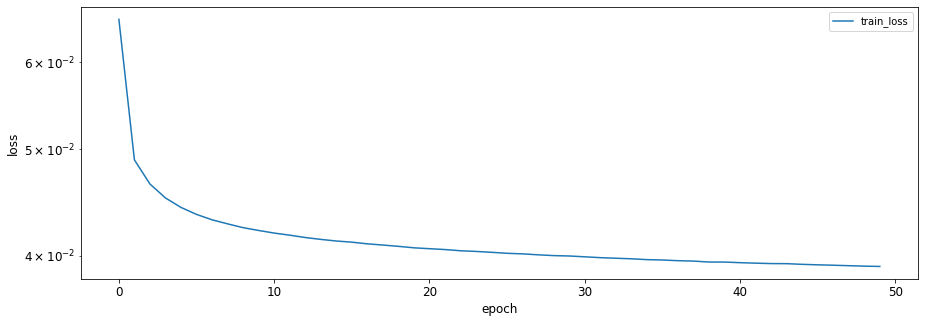

In [11]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

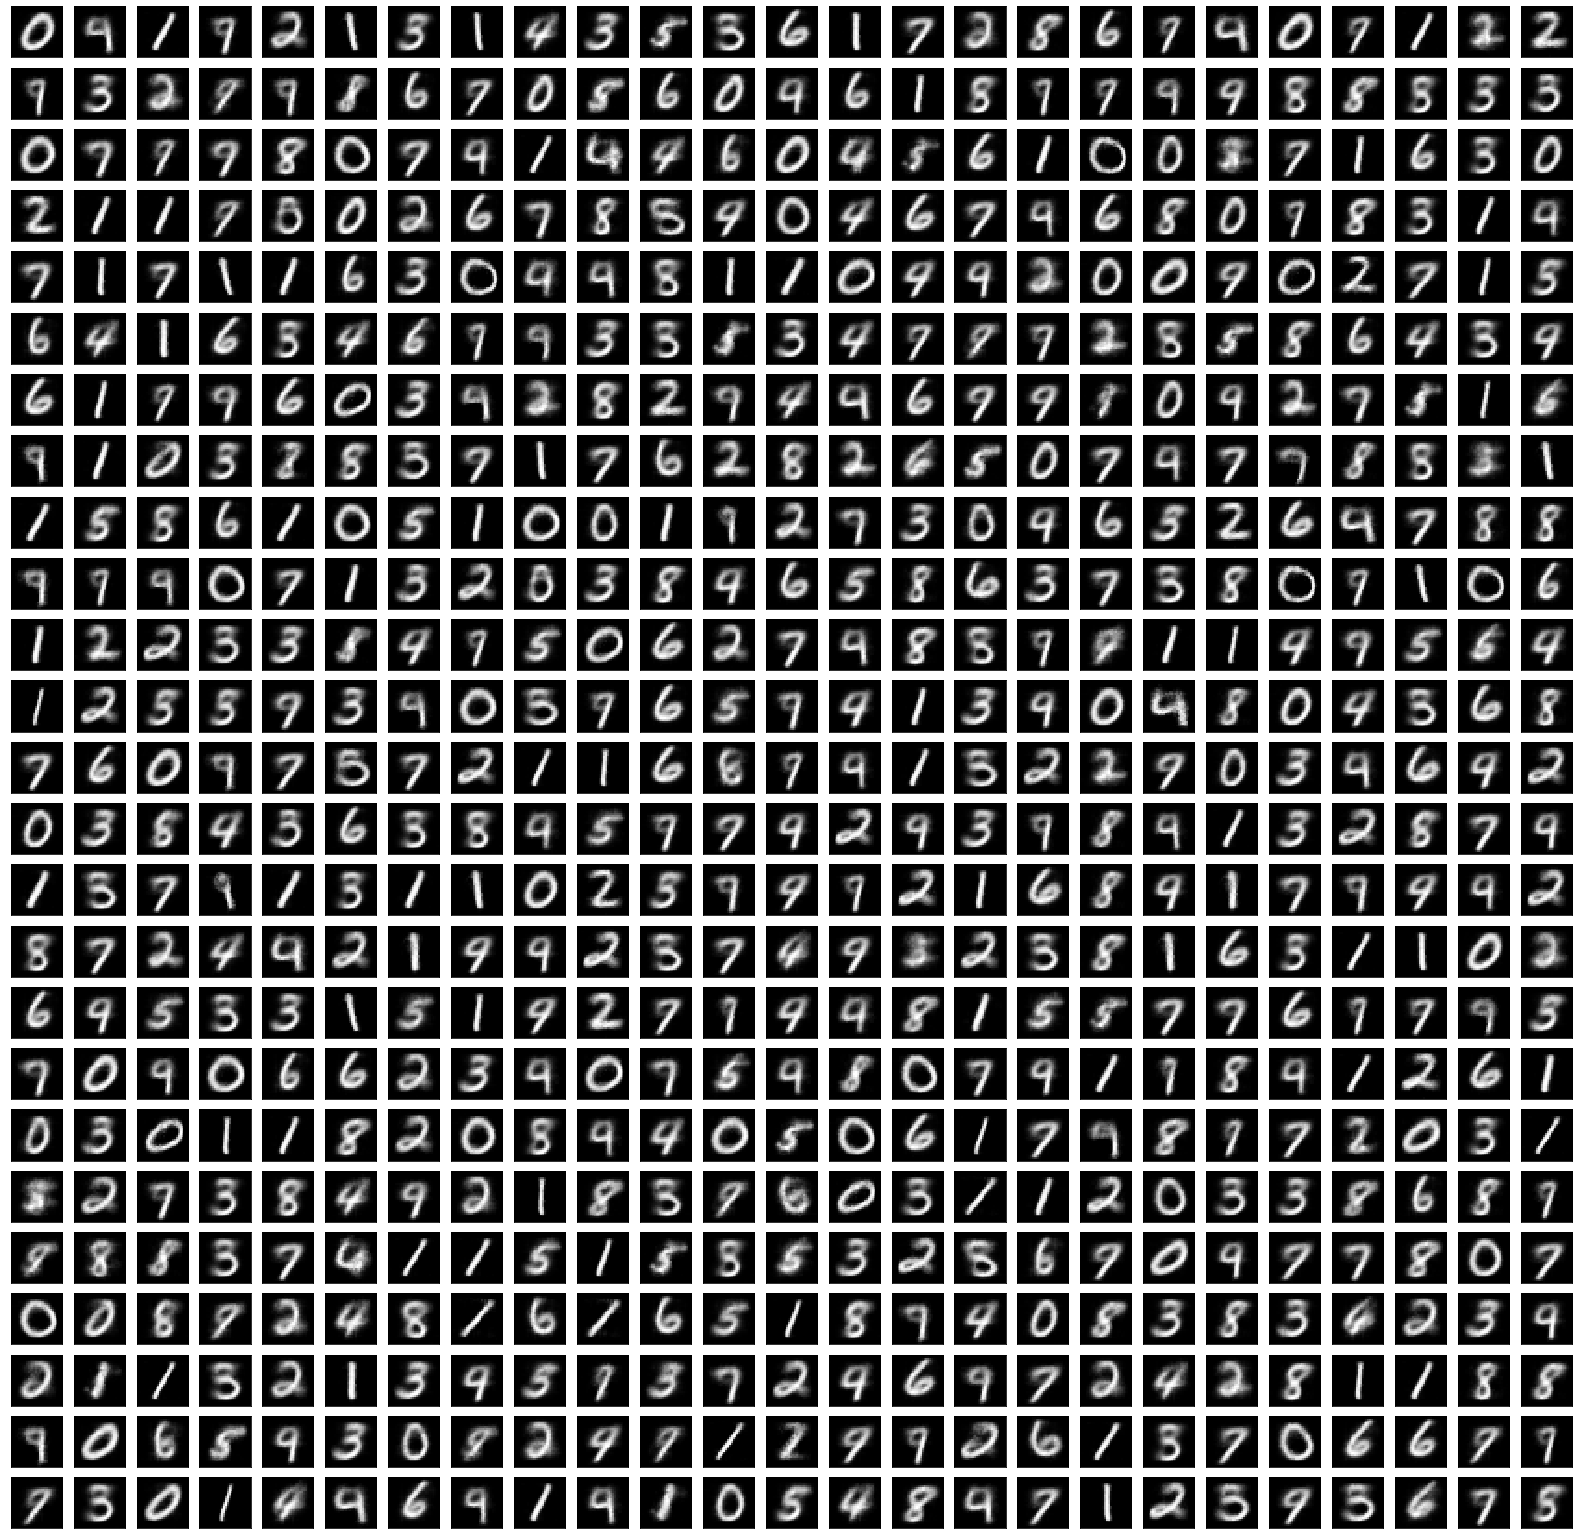

In [12]:
# Visualization of 25 x 25 reconstructed images of digits
fig = plt.figure(figsize=(28,28))
ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25,25,ind)
        show(autoencoder.predict(np.expand_dims(x_images[ind], 0)).reshape(28, 28))
        plt.xticks([])
        plt.yticks([])
        ind+=1

In [15]:
encoder = Model(input, x)

# Building the decoder
encoded_input = Input(shape=(2,))
encoded_layer_1 = autoencoder.layers[-4]
encoded_layer_2 = autoencoder.layers[-3]
encoded_layer_3 = autoencoder.layers[-2]
encoded_layer_4 = autoencoder.layers[-1]

decoder = encoded_layer_1(encoded_input)
decoder = encoded_layer_2(decoder)
decoder = encoded_layer_3(decoder)
decoder = encoded_layer_4(decoder)
decoder = Model(encoded_input, decoder)

ValueError: ignored

### 5.4 Visualizing the mapping of the labeled images in the manifold

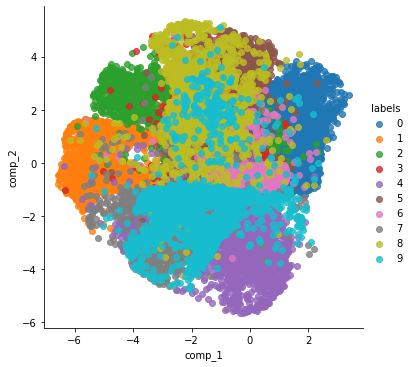

In [22]:
import seaborn as sns

x_flat = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])

x_proj = encoder.predict(x_flat[:60000])
x_proj.shape

proj = pd.DataFrame(x_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_train[:60000]
sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)

### 5.5. Generating new digits by moving along the manifold (latent 2D space)
**Please, adjust the scale whenever necessary.**

### 5.5.1 Moving along a circle

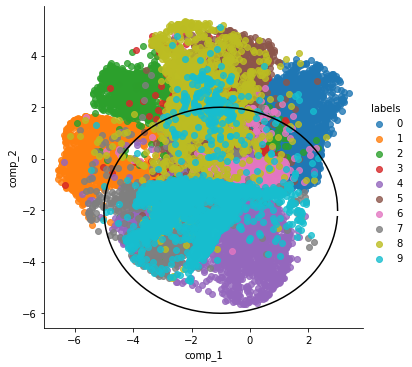

In [23]:
_ = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)
all_x = [4 * np.cos(2 * np.pi / 100 * i) - 1 for i in range(100)]
all_y = [4 * np.sin(2 * np.pi / 100 * i) - 2 for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

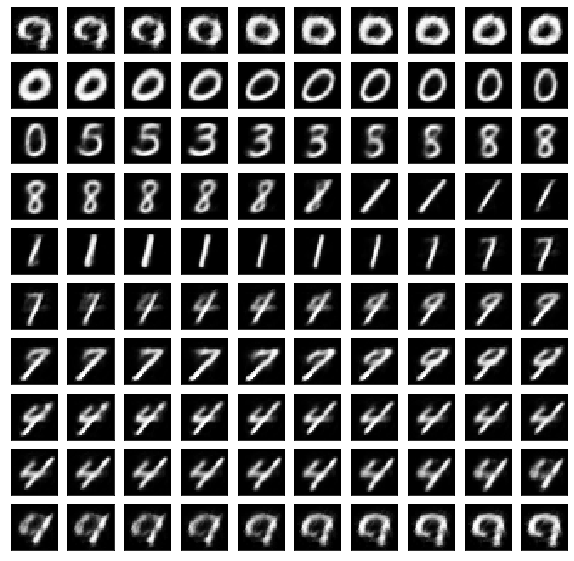

In [24]:
# moving along a circle:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)
    
    x = 4 * np.cos(2 * np.pi / 100 * i) - 1
    y = 4 * np.sin(2 * np.pi / 100 * i) - 2
    
    pt = np.array([[x, y]])
    _ = show(decoder.predict(pt).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

### 5.5.2 Moving along an ellipse

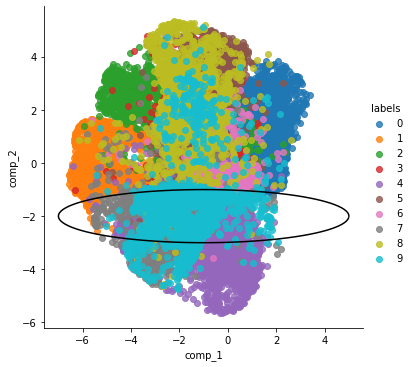

In [25]:
_ = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)
all_x = [6 * np.cos(2 * np.pi / 100 * i) - 1 for i in range(100)]
all_y = [1 * np.sin(2 * np.pi / 100 * i) - 2 for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

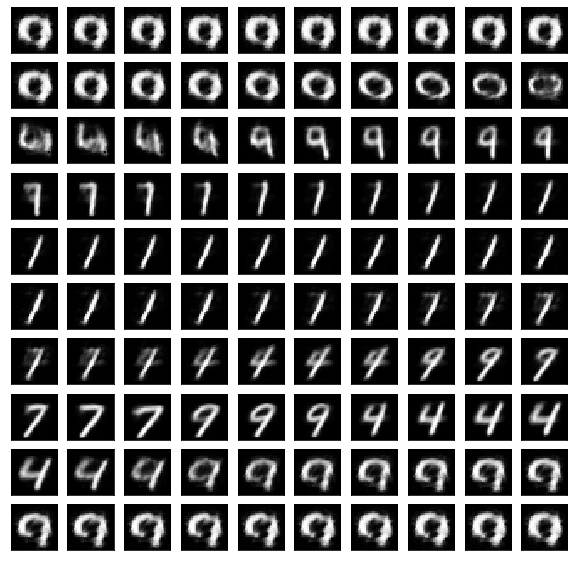

In [26]:
# moving along a elipse:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)
    
    x = 6 * np.cos(2 * np.pi / 100 * i) - 1
    y = 1 * np.sin(2 * np.pi / 100 * i) - 2
    
    pt = np.array([[x, y]])
    _ = show(decoder.predict(pt).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

### 5.5.3 Moving along a grid

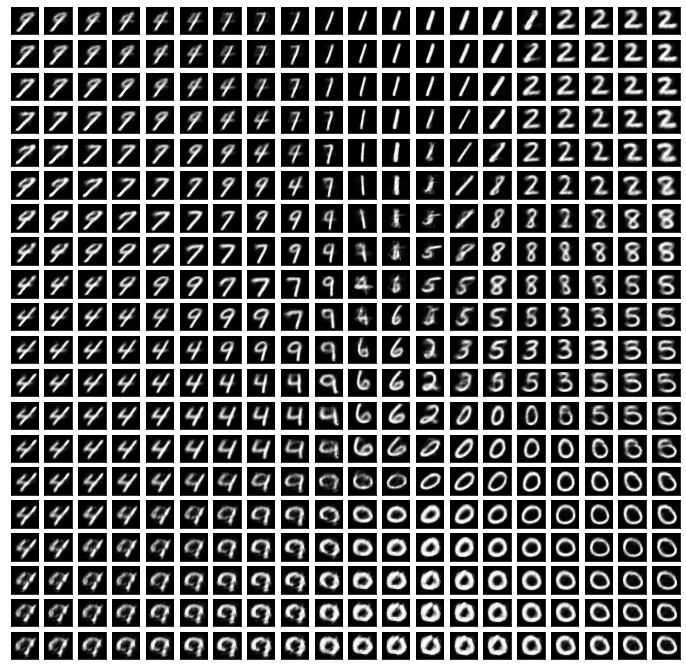

In [27]:
# moving along a elipse:
_ = plt.figure(figsize=(12, 12))

for i in range(20):
    for j in range(20):
        
        _ = plt.subplot(20, 20, i * 20 + j + 1)
        
        pt = np.array([[ -6 + 10 * i / 19, -6 + 10 * j / 19]])
        _ = show(decoder.predict(pt).reshape((28, 28)))
        _ = plt.xticks([])
        _ = plt.yticks([])